# 了解RAG 中的 Embedding Vectors

1. 什么是`embedding`
2. Sentence BERT
3. 如何选取`embedding model` 

## 什么是`embedding`

考虑一下如何表示“男人” ， “女人”，我们可以从性别上出发，假设男性性别可以表示‘1’ ， 女性性别可以表示为‘9’，即可将“男人” ， “女人”区分开来

那么当加入“男孩” ，“女孩”的时候，单纯靠性别已经无法完全区分上述四个单词，此时可以引入年龄， **"男人"：[1,35] , "女人":[9,35] , "男孩"：[1,10] , "女孩":[9,10]**

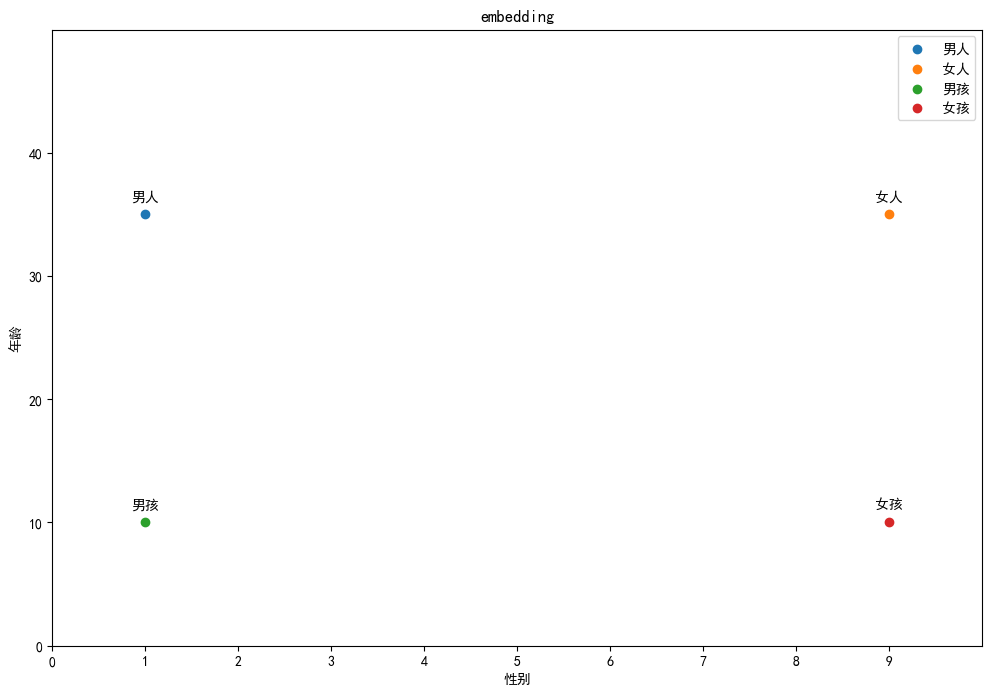

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 定义点的坐标和标签
points = {
    "男人": [1, 35],
    "女人": [9, 35],
    "男孩": [1, 10],
    "女孩": [9, 10]
}

x_values = [point[0] for point in points.values()]
y_values = [point[1] for point in points.values()]
labels = list(points.keys())

plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    plt.scatter(x_values[i], y_values[i], label=label)

# 设置X轴和Y轴的范围和精度
plt.xlim([0,10])
plt.ylim([0,50])
plt.xticks(np.arange(0, 10, 1))  
plt.yticks(np.arange(0, 50, 10))  

# 添加标签
for i, label in enumerate(labels):
    plt.annotate(label, (x_values[i], y_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
# 设置图表标题和坐标轴标签
plt.title("embedding")
plt.xlabel("性别")
plt.ylabel("年龄")
# 显示图例
plt.legend()
# 显示图表
plt.show()


随着词汇的逐渐增加，二维已经不足以区分单词，例如引入新的单词 “国王” ，“皇后”,只靠年龄和性别，已经无法区分国王 —— 男人 ， 皇后———女人

所以我们引入新的特征，例如'皇室的' ，则 **"男人": [1, 35, 1], "女人": [9, 35, 1],"男孩": [1, 10, 1],"女孩": [9, 10, 1],"国王": [1, 35, 9],"皇后": [9, 35, 9]**

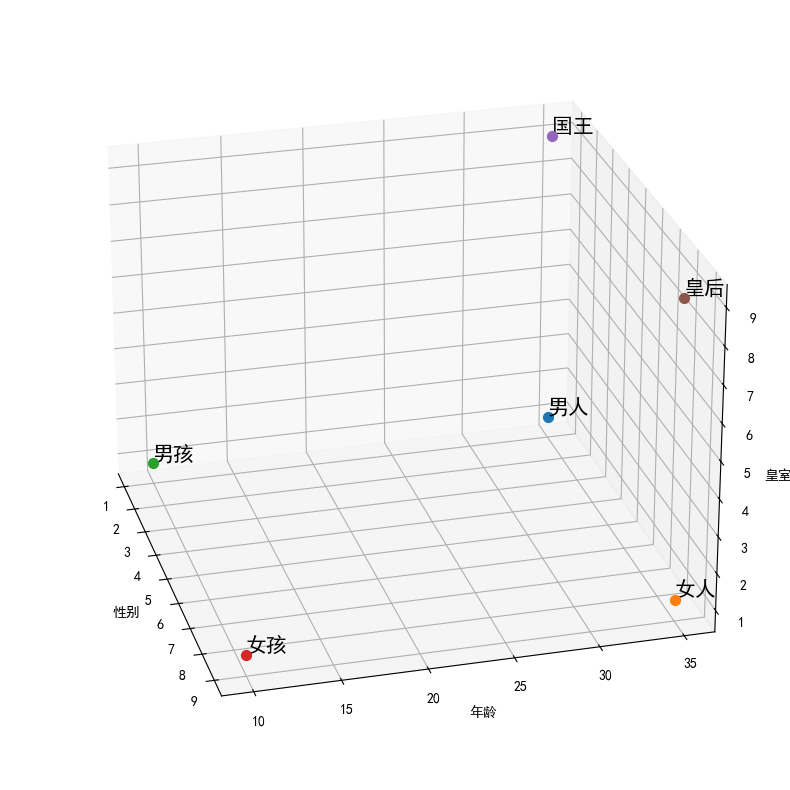

In [6]:
points = {
    "男人": [1, 35, 1],
    "女人": [9, 35, 1],
    "男孩": [1, 10, 1],
    "女孩": [9, 10, 1],
    "国王": [1, 35, 9],
    "皇后": [9, 35, 9]
}

x_coords = [point[0] for point in points.values()]
y_coords = [point[1] for point in points.values()]
z_coords = [point[2] for point in points.values()]
labels = list(points.keys())

# 创建图形和三维坐标轴
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(labels):
    ax.scatter(x_coords[i], y_coords[i], z_coords[i], label=label , s=50)

# 为每个点添加标签，并设置偏移量
for i, label in enumerate(labels):
    ax.text(x_coords[i], y_coords[i], z_coords[i], label, fontsize=15, horizontalalignment='left', verticalalignment='bottom')


# 设置标签
ax.set_xlabel('性别')
ax.set_ylabel('年龄')
ax.set_zlabel('皇室')

# 调整视角
ax.view_init(elev=25., azim= -15)
# 显示图形
plt.show()


# embedding模型选取

## m3e模型

In [7]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('moka-ai/m3e-base')

#Our sentences we like to encode
sentences =['为什么良好的睡眠对健康至关重要?' ,
        '良好的睡眠有助于身体修复自身,增强免疫系统',
        '在监督学习中，算法经常需要大量的标记数据来进行有效学习',
        '睡眠不足可能导致长期健康问题,如心脏病和糖尿病',
        '这种学习方法依赖于数据质量和数量',
        '它帮助维持正常的新陈代谢和体重控制',
        '睡眠对儿童和青少年的大脑发育和成长尤为重要',
        '良好的睡眠有助于提高日间的工作效率和注意力',
        '监督学习的成功取决于特征选择和算法的选择',
        '量子计算机的发展仍处于早期阶段，面临技术和物理挑战',
        '量子计算机与传统计算机不同，后者使用二进制位进行计算',
        '机器学习使我睡不着觉',
]
#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

In [19]:
len(embeddings)

12

In [20]:
len(embeddings[0])

768

In [10]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2 ,  perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings)

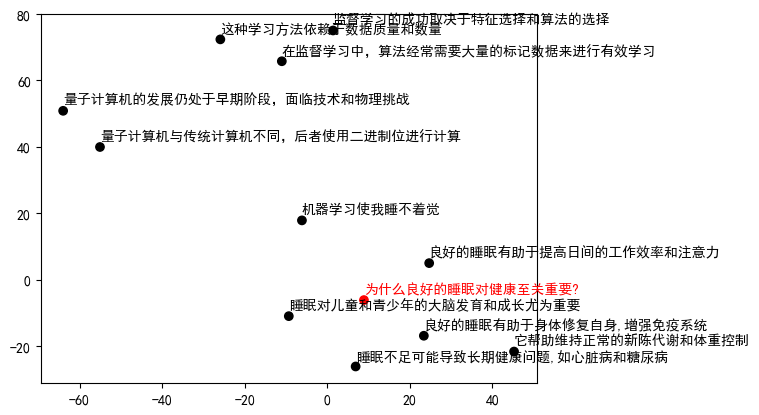

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False


color_list =  ['black'] * len(embeddings_2d[1:]) 
color_list.insert(0, 'red')

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1] , color=color_list )

for i in range(len(embeddings_2d)):
    plt.text(embeddings_2d[:,0][i], embeddings_2d[:,1][i]+2,  sentences[i] ,color=color_list[i] )

# 显示图表
plt.show()

## openai text-embedding-ada-002 embedding模型

In [13]:
import openai
import os

openai.api_key = "YOUR-OPENAI-KEY"


In [15]:
import openai
response = openai.Embedding.create(
  input=sentences,
  model="text-embedding-ada-002",
)

In [16]:
embeddings_openai = [item['embedding'] for item in response['data']]

tsne = TSNE(n_components=2 ,  perplexity=5)
embeddings_openai_2d = tsne.fit_transform(np.array(embeddings_openai))

In [17]:
len(embeddings_openai)

12

In [18]:
len(embeddings_openai[0])

1536

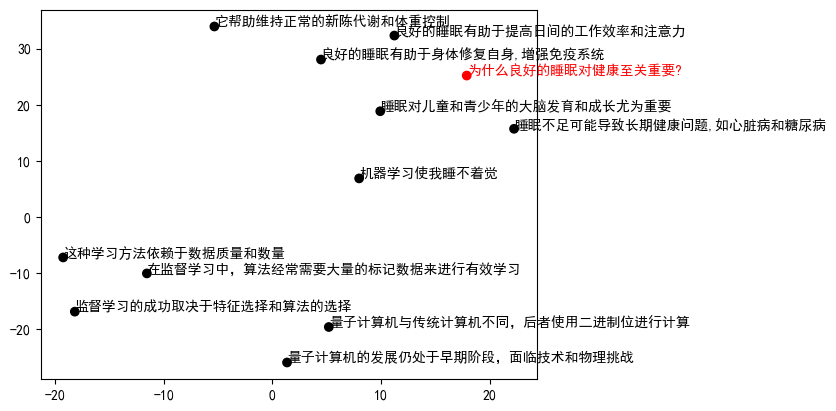

In [21]:
plt.scatter(embeddings_openai_2d[:, 0], embeddings_openai_2d[:, 1] , color=color_list )

for i in range(len(embeddings_openai_2d)):
    plt.text(embeddings_openai_2d[:,0][i], embeddings_openai_2d[:,1][i],  sentences[i] ,color=color_list[i] )

# 显示图表
plt.show()